<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%202/CNN_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [19]:
# 1. Load dataset dan transformasi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [20]:
#2 (Kernel 5x5) ==
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # tambahan
        self.pool = nn.MaxPool2d(2, 2)


        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))   # 28 -> 14
        x = self.pool(nn.ReLU()(self.conv2(x)))   # 14 -> 7
        x = nn.ReLU()(self.conv3(x))              # tetap 7x7
        x = x.view(-1, 64 * 7 * 7)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x


In [21]:
# 3. Inisialisasi model, loss, optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [22]:
#4 pelatihan
epochs = 5

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    epoch_train_loss = running_loss / len(trainloader)
    epoch_train_acc = 100.0 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    # ---------- Evaluasi pada data test/validation setiap epoch ----------
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    epoch_val_loss = val_running_loss / len(testloader)
    epoch_val_acc = 100.0 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    print(f'Epoch [{epoch+1}/{epochs}] '
          f'Train Loss: {epoch_train_loss:.4f} Train Acc: {epoch_train_acc:.2f}% | '
          f'Val Loss: {epoch_val_loss:.4f} Val Acc: {epoch_val_acc:.2f}%')


Epoch [1/5] Train Loss: 0.1489 Train Acc: 95.44% | Val Loss: 0.0402 Val Acc: 98.64%
Epoch [2/5] Train Loss: 0.0448 Train Acc: 98.65% | Val Loss: 0.0333 Val Acc: 98.83%
Epoch [3/5] Train Loss: 0.0313 Train Acc: 99.00% | Val Loss: 0.0272 Val Acc: 99.10%
Epoch [4/5] Train Loss: 0.0237 Train Acc: 99.25% | Val Loss: 0.0289 Val Acc: 99.00%
Epoch [5/5] Train Loss: 0.0189 Train Acc: 99.38% | Val Loss: 0.0238 Val Acc: 99.22%


In [23]:
# 5. Evaluasi
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Akurasi Uji: {100 * correct / total:.2f}%')



Akurasi Uji: 99.22%


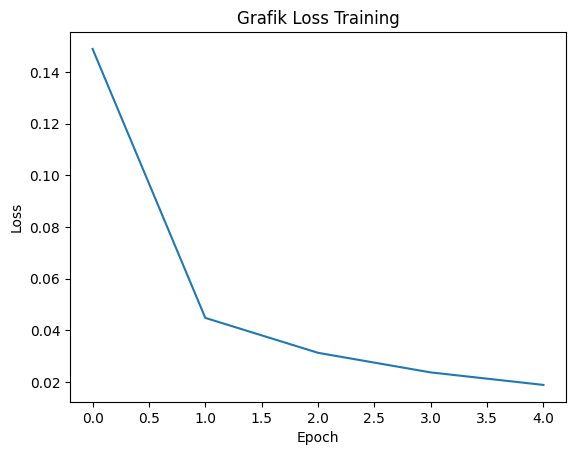

In [24]:
# 6. Plot grafik loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Grafik Loss Training')
plt.show()


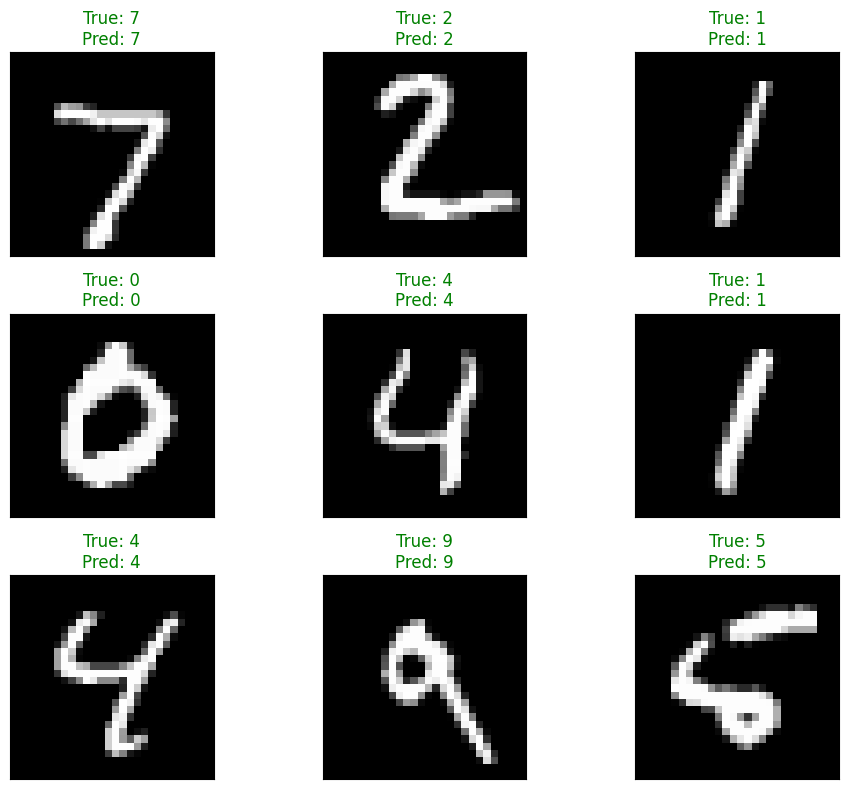

In [25]:
model.eval()
images, labels = next(iter(testloader))
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

fig = plt.figure(figsize=(10, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"True: {labels[i].item()}\nPred: {predicted[i].item()}",
                 color=("green" if predicted[i] == labels[i] else "red"))
plt.tight_layout()
plt.show()